In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,roc_curve,auc
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

In [26]:
df = pd.read_csv("Air Quality Missing Data.csv")

In [27]:
df

,Date,Ozone,Solar,Wind,Temp
0,01-05-1976,41.0,190.0,7.4,67
1,02-05-1976,36.0,118.0,8.0,72
2,03-05-1976,12.0,149.0,12.6,74
3,04-05-1976,18.0,313.0,11.5,62
4,05-05-1976,NaN,NaN,14.3,56
...,...,...,...,...,...
148,26-09-1976,30.0,193.0,6.9,70
149,27-09-1976,NaN,145.0,13.2,77
150,28-09-1976,14.0,191.0,14.3,75
151,29-09-1976,18.0,131.0,8.0,76


In [28]:
le_results = LabelEncoder()
df['Temp'] = le_results.fit_transform(df['Temp'])

In [29]:
categorical_columns = [
    'Ozone',
    'Solar',
    'Wind',
    'Temp',
]

In [30]:
for col in categorical_columns:
  df[col] = LabelEncoder().fit_transform(df[col])

In [31]:
X = df.iloc[:, 1:-1]
y=df['Temp']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [33]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred

array([29, 25, 29, 21, 35, 24, 31, 25, 25,  5, 12,  8, 28, 24, 31, 35, 25,
        4, 36, 29, 12, 32, 17, 30, 21, 29, 29, 11, 13,  2, 24])

In [36]:
accuracy = accuracy_score(y_test , y_pred)
accuracy

0.0967741935483871

ValueError: The number of FixedLocator locations (31), usually from a call to set_ticks, does not match the number of labels (40).

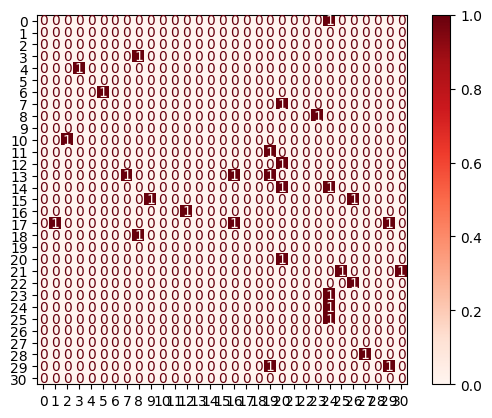

In [37]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=le_results.classes_)
disp.plot(cmap='Reds')
plt.show()

In [38]:
joblib.dump(le_results,'label_encoder_results.joblib')
joblib.dump(model,'Air_Quality_report_model.joblib')

['Air_Quality_report_model.joblib']